In [69]:
import json
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [70]:
models_parent_dir='/data/distribution_shift/models'

model_dirs=[f.path for f in os.scandir(models_parent_dir) if f.is_dir()]

In [71]:
results=[['model_name', 'test_set_name','f1', 'exact_match']]
for model_dir in model_dirs:
    model_name = model_dir.split("/")[-1:][0]
    model_scores=[f.path for f in os.scandir(model_dir+'/results') if f.path.endswith('_score.json')]
    for model_score_path in model_scores:
        
        with open(model_score_path) as json_file:
            scores = json.load(json_file)
            
        test_set_name = model_score_path.split("/")[-1:][0].replace('_score.json', '')
        results.append([model_name, test_set_name, scores['f1'], scores['exact_match']])


### Add Meta

In [72]:
model_names = ['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQA', 'NaturalQuestions']

model_training_sets = [
#     ['model_name', 'SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQA', 'NaturalQuestions'],
    ['model01', True, True, True, True, True, True],
    ['model02', True, False, True, True, True, True],
    ['model03', False, True, True, True, True, True],
    ['model04', True, True, False, True, True, True],
    ['model05', True, True, False, False, False, False],
    ['model06', False, False, True, True, True, True],
    ['model07', True, False, False, False, False, False],
    ['model08', False, True, False, False, False, False],
    ['model09', False, False, True, False, False, False],
    ['model10', False, False, False, True, False, False],
    ['model11', False, False, False, False, True, False],
    ['model12', False, False, False, False, False, True],
    ['model13', True, True, False, True, True, True],
    ['model14', True, True, True, False, True, True],
    ['model15', True, True, True, True, False, True],
    ['model16', True, True, True, True, True, False]
]

#Extend column names
results[0].extend(['training_set_count', 'model_trained_sets', 'in_domain'] + model_names)

for result in results:
    for model_training_set in model_training_sets:
        if result[0] == model_training_set[0]:
            training_set_mask = model_training_set[1:]
#             print([i for idx, i in enumerate(model_names) if training_set_mask[idx]])
            model_trained_sets = [i for idx, i in enumerate(model_names) if training_set_mask[idx]]
            
            # training_set_count
            result.append(len(model_trained_sets))
            # model_trained_sets
            result.append(model_trained_sets)
            # in_domain
            result.append(result[1] in model_trained_sets)
            # Training models
            result.extend(model_training_set[1:])
            
print(results)

[['model_name', 'test_set_name', 'f1', 'exact_match', 'training_set_count', 'model_trained_sets', 'in_domain', 'SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQA', 'NaturalQuestions'], ['model08', 'SearchQA', 45.34307385663825, 36.81978798586572, 1, ['NewsQA'], False, False, True, False, False, False, False], ['model08', 'NaturalQuestions', 42.14957216150568, 31.061078217513245, 1, ['NewsQA'], False, False, True, False, False, False, False], ['model08', 'RelationExtraction', 73.39062202409339, 62.1438263229308, 1, ['NewsQA'], False, False, True, False, False, False, False], ['model08', 'DROP', 15.847023149064851, 9.91350632069195, 1, ['NewsQA'], False, False, True, False, False, False, False], ['model08', 'NewsQA', 28.707356326514756, 19.65811965811966, 1, ['NewsQA'], True, False, True, False, False, False, False], ['model08', 'TextbookQA', 20.960805661404457, 16.833000665335994, 1, ['NewsQA'], False, False, True, False, False, False, False], ['model08', 'Amazon', 39.269315300048454,

In [73]:
results_csv = models_parent_dir+"/model_scores.csv"

with open(results_csv, mode='w') as employee_file:
    csv_writer = csv.writer(employee_file)
    csv_writer.writerows(results)

In [74]:
scores_df = pd.read_csv(results_csv)

scores_df.groupby('model_name')[["f1", "exact_match"]].mean()

,f1,exact_match
model_name,,
model01,68.765107,57.994429
model02,66.814141,56.007684
model03,61.296029,50.203685
model04,67.982584,56.086671
model05,59.724164,48.148188
model06,62.563647,51.701559
model07,53.400246,39.764355
model08,40.402753,31.502581
model09,40.402753,31.502581


In [75]:
scores_df.head(20)

,model_name,test_set_name,f1,exact_match,training_set_count,model_trained_sets,in_domain,SQuAD,NewsQA,TriviaQA,SearchQA,HotpotQA,NaturalQuestions
0,model08,SearchQA,45.343074,36.819788,1,['NewsQA'],False,False,True,False,False,False,False
1,model08,NaturalQuestions,42.149572,31.061078,1,['NewsQA'],False,False,True,False,False,False,False
2,model08,RelationExtraction,73.390622,62.143826,1,['NewsQA'],False,False,True,False,False,False,False
3,model08,DROP,15.847023,9.913506,1,['NewsQA'],False,False,True,False,False,False,False
4,model08,NewsQA,28.707356,19.658120,1,['NewsQA'],True,False,True,False,False,False,False
5,model08,TextbookQA,20.960806,16.833001,1,['NewsQA'],False,False,True,False,False,False,False
6,model08,Amazon,39.269315,29.590691,1,['NewsQA'],False,False,True,False,False,False,False
7,model08,RACE,19.177831,13.056380,1,['NewsQA'],False,False,True,False,False,False,False
8,model08,SQuAD,47.775738,38.060341,1,['NewsQA'],False,False,True,False,False,False,False
9,model08,New_Wiki,45.613398,34.118541,1,['NewsQA'],False,False,True,False,False,False,False


In [76]:
scores_df.groupby('test_set_name')[["f1", "exact_match"]].mean()

,f1,exact_match
test_set_name,,
Amazon,60.724470,47.545805
BioASQ,54.757005,40.113863
DROP,28.101439,19.752162
DuoRC,44.446237,35.734510
HotpotQApred,62.031954,46.090705
NYT,73.551073,63.996725
NaturalQuestions,63.573045,51.287395
New_Wiki,72.569895,61.112430
NewsQA,50.436731,37.298196


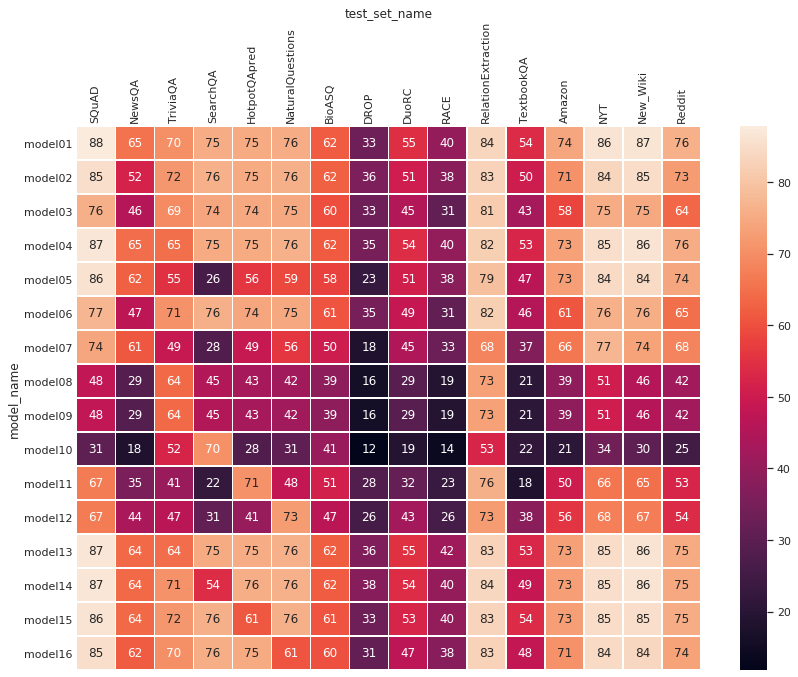

In [77]:
plt.figure(figsize=(14,10))

scores = scores_df.pivot("model_name", "test_set_name", "f1")

model_order=['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions', 'BioASQ', 'DROP', 'DuoRC', 'RACE', 'RelationExtraction', 'TextbookQA', 'Amazon', 'NYT', 'New_Wiki', 'Reddit']

ax = sns.heatmap(scores[model_order], annot=True,  linewidths=.5)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)

plt.show()

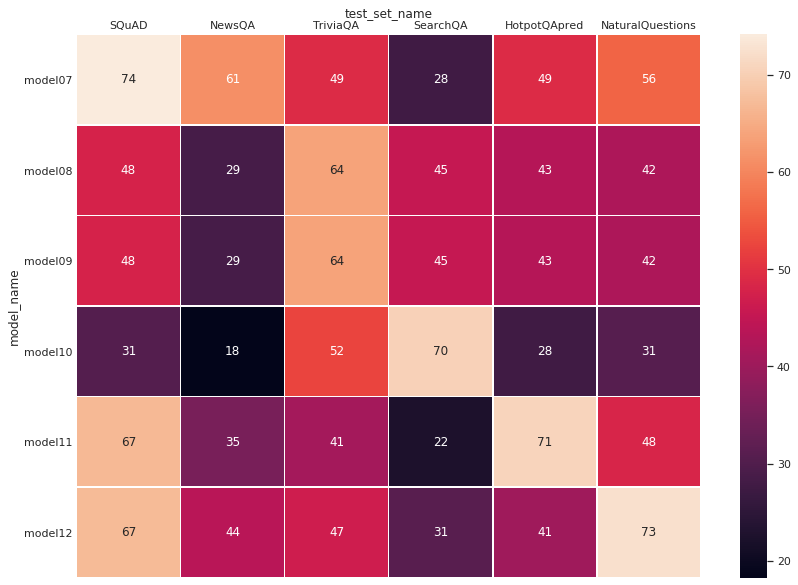

In [78]:
plt.figure(figsize=(14,10))

scores = scores_df.loc[scores_df['model_name'].isin(['model07', 'model08', 'model09', 'model10', 'model11', 'model12'])].pivot("model_name", "test_set_name", "f1")

# model_order=['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions', 'BioASQ', 'DROP', 'DuoRC', 'RACE', 'RelationExtraction', 'TextbookQA']
model_order=['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions']

# scores.loc[scores['model_name'] == 'model07']

ax = sns.heatmap(scores[model_order], annot=True,  linewidths=.5)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)
plt.show()

In [79]:
scores[['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions', 'BioASQ', 'DROP', 'DuoRC', 'RACE', 'RelationExtraction', 'TextbookQA']]
scores

test_set_name,Amazon,BioASQ,DROP,DuoRC,HotpotQApred,NYT,NaturalQuestions,New_Wiki,NewsQA,RACE,Reddit,RelationExtraction,SQuAD,SearchQA,TextbookQA,TriviaQA
model_name,,,,,,,,,,,,,,,,
model07,66.168285,50.208119,18.214432,45.047831,49.131654,77.303078,55.972728,73.734716,61.237606,32.692773,68.218433,68.282165,74.167153,27.797444,37.078984,49.148536
model08,39.269315,38.994190,15.847023,29.370128,43.253154,50.530865,42.149572,45.613398,28.707356,19.177831,42.184893,73.390622,47.775738,45.343074,20.960806,63.876076
model09,39.269315,38.994190,15.847023,29.370128,43.253154,50.530865,42.149572,45.613398,28.707356,19.177831,42.184893,73.390622,47.775738,45.343074,20.960806,63.876076
model10,20.819185,40.757704,11.881023,19.173460,27.670855,33.682114,30.844100,30.459362,18.259500,14.011482,25.459243,52.734790,30.555759,70.346514,21.773690,52.344409
model11,50.415918,51.445311,28.053060,31.860205,70.815118,65.960280,48.339233,64.660741,35.491924,23.414306,52.718301,75.952068,66.783238,22.464919,18.191682,41.162218
model12,55.631507,46.827969,25.727691,42.940224,40.512202,67.537239,72.554195,67.270937,43.677922,25.875056,53.909902,72.533989,67.008745,31.092040,38.027373,46.735513
